# Post Frequency!

In [2]:
from scripts.preprocess_data import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = load_data()

In [4]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
df['datetime'].dt.date.value_counts().sort_index()

datetime
2024-10-31    70260
Name: count, dtype: int64

All Tweets happen on the 31st October 2024.

C:\Users\Simon.Luttmann\AppData\Local\Temp\ipykernel_24600\493794616.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hours, y=tweet_counts, palette="viridis")


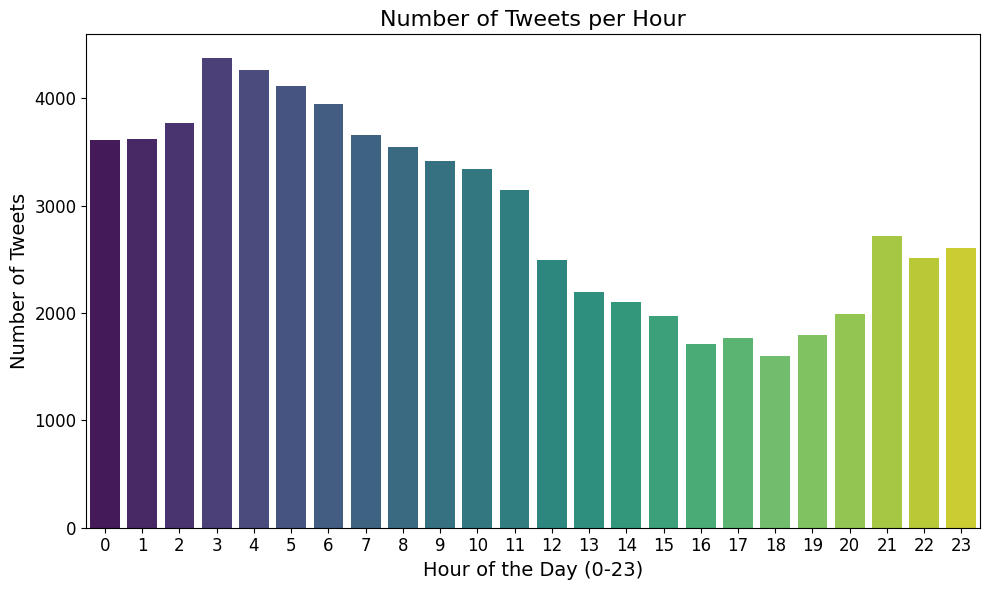

In [5]:
hourly_tweets= df['datetime'].dt.hour.value_counts().sort_index().to_dict()
hours = list(hourly_tweets.keys())
tweet_counts = list(hourly_tweets.values())

# Set up the figure
plt.figure(figsize=(10, 6))

# Use Seaborn for a bar plot
sns.barplot(x=hours, y=tweet_counts, palette="viridis")

# Customize the plot
plt.title("Number of Tweets per Hour", fontsize=16)
plt.xlabel("Hour of the Day (0-23)", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

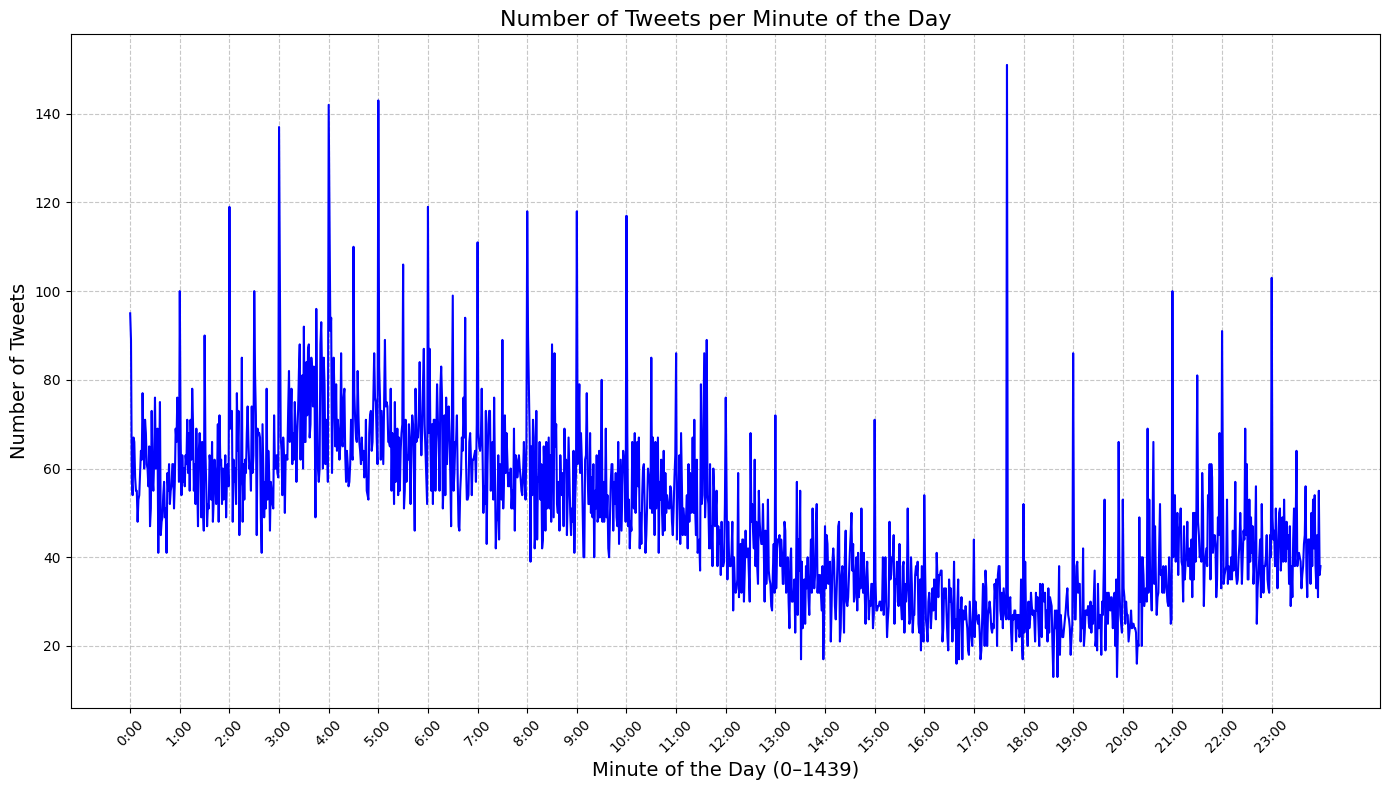

In [6]:
minute_tweets = (df['datetime'].dt.hour * 60 + df['datetime'].dt.minute).value_counts().sort_index()
minutes = minute_tweets.index
tweet_counts = minute_tweets.values
plt.figure(figsize=(14, 8))

# Line plot for tweets per minute of the day
sns.lineplot(x=minutes, y=tweet_counts, color='blue', linewidth=1.5)

# Customize the plot
plt.title("Number of Tweets per Minute of the Day", fontsize=16)
plt.xlabel("Minute of the Day (0–1439)", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.xticks(ticks=range(0, 1440, 60), labels=[f"{i}:00" for i in range(24)], rotation=45)
plt.grid(visible=True, which="major", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

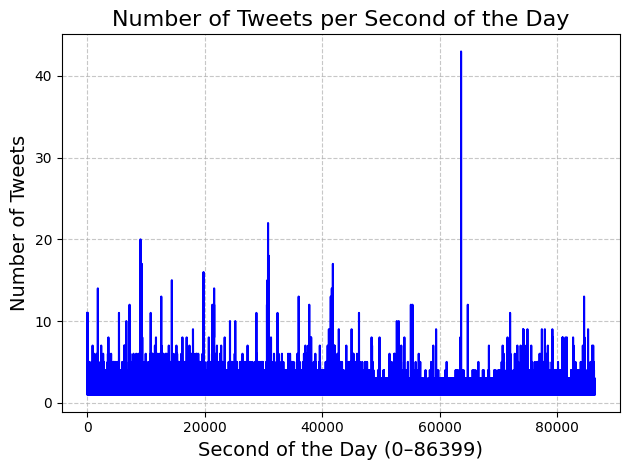

In [7]:
second_tweet = (
    df['datetime'].dt.hour * 3600 +
    df['datetime'].dt.minute * 60 +
    df['datetime'].dt.second
).value_counts().sort_index()
seconds = second_tweet.index
tweet_counts = second_tweet.values
sns.lineplot(x=seconds, y=tweet_counts, color='blue', linewidth=1.5)

# Customize the plot
plt.title("Number of Tweets per Second of the Day", fontsize=16)
plt.xlabel("Second of the Day (0–86399)", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.grid(visible=True, which="major", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## What is causing this outlier in tweets per second of the day? 

In [12]:
second_tweet.nlargest(5)

datetime
63653    43
63654    34
63652    26
30785    22
9065     20
Name: count, dtype: int64

In [18]:
df[(df['datetime'].dt.hour * 3600 +
    df['datetime'].dt.minute * 60 +
    df['datetime'].dt.second) == 63653].head(10)

,timestamp,text,text_id,user,user_id,datetime
56463,1730396453000,Bring comfort dogs to every university lecture...,2065638974,rphillips,1042767568,2024-10-31 17:40:53
56464,1730396453000,Bring comfort dogs to every university lecture...,2034992652,jenniferbaker,1077008559,2024-10-31 17:40:53
56465,1730396453000,Bring comfort dogs to every university lecture...,2035509190,michele87,1098664340,2024-10-31 17:40:53
56466,1730396453000,Bring comfort dogs to every university lecture...,2083807315,joannarocha,1069442463,2024-10-31 17:40:53
56467,1730396453000,Bring comfort dogs to every university lecture...,2089822195,shepherdjustin,1006970421,2024-10-31 17:40:53
56468,1730396453000,Bring comfort dogs to every university lecture...,2078986662,jo41,1036450668,2024-10-31 17:40:53
56469,1730396453000,Bring comfort dogs to every university lecture...,2048079629,riosjudith,1003854134,2024-10-31 17:40:53
56470,1730396453000,Bring comfort dogs to every university lecture...,2021260282,robertmartinez,1067343640,2024-10-31 17:40:53
56471,1730396453000,Bring comfort dogs to every university lecture...,2054782630,renee39,1046740753,2024-10-31 17:40:53
56472,1730396453000,Bring comfort dogs to every university lecture...,2049025906,swilliams,1052434966,2024-10-31 17:40:53


In [19]:
# Extract the text of the tweet using the 'text_id'
specific_text = df['text'].iloc[56463]

# Print out the extracted text
print(specific_text)

Bring comfort dogs to every university lecture! 🎓❤🐶️ Let's make our campuses fluffy again! Join the movement! #PawsForLearning #UniMS


In [27]:
len(df[df['text'] == specific_text])

130

This Text occurs 130 Times in the data. Maybe this is a bot who spams this text or somebody messed with the data ;)